The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file.


The gender with the most Nobel prize winner is : Male
The most common birth country of Nobel prize winner is : United States of America

The proportion of USA born winners per decade
   decade  usa_born_winner
0    1900         0.017544
1    1910         0.075000
2    1920         0.074074
3    1930         0.250000
4    1940         0.302326
The decade with the highest proportion of US-born winners is:  2000


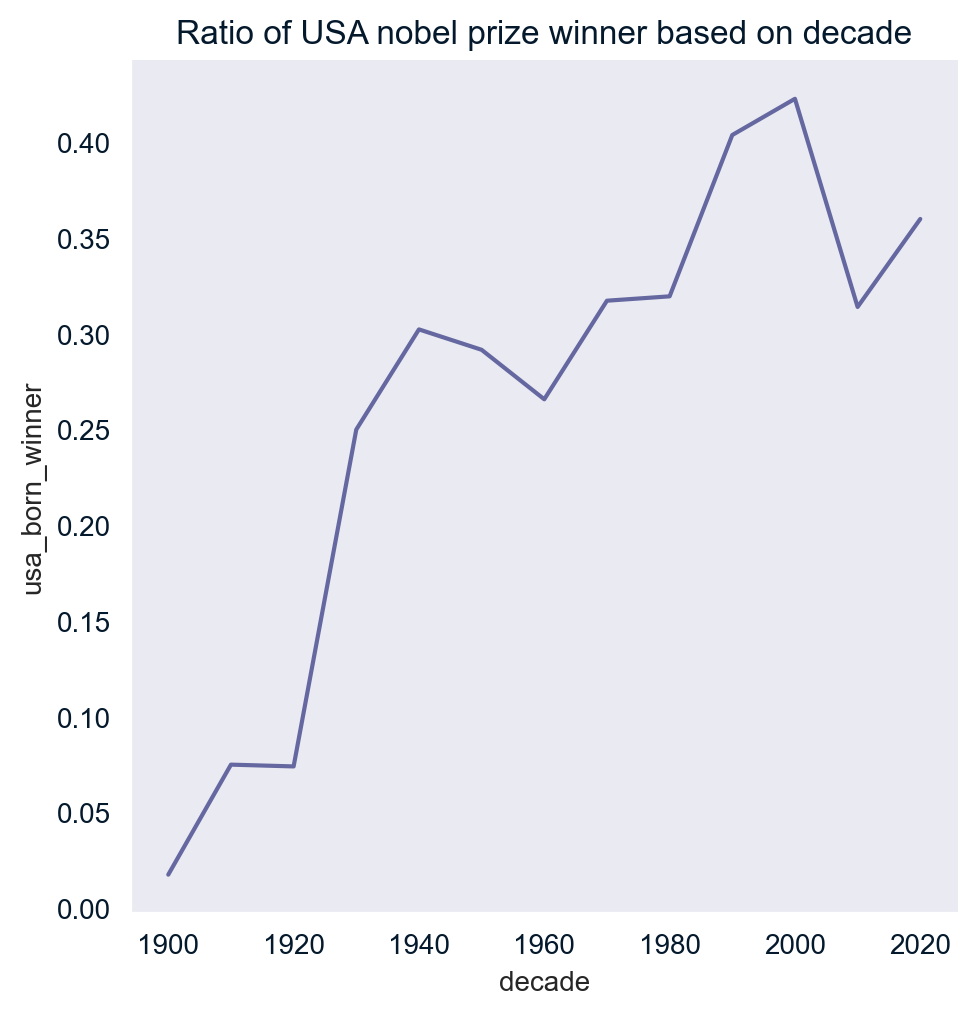


The proportion of USA born female winners per decade
   decade    category  female_winner
0    1900   Chemistry       0.000000
1    1900  Literature       0.100000
2    1900    Medicine       0.000000
3    1900       Peace       0.071429
4    1900     Physics       0.076923

 The first woman to win a Nobel Prize was Marie Curie, née Sklodowska, in the category of Physics.

 The individuals or organizations who have won more than one Nobel Prize throught the years are :
['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']


In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

nobel=pd.read_csv('data/nobel.csv')

top_gender = nobel['sex'].value_counts().index[0]
top_country = nobel['birth_country'].value_counts().index[0]
print("The gender with the most Nobel prize winner is :", top_gender)
print("The most common birth country of Nobel prize winner is :", top_country)


# Calculating the proportion of USA born winners per decade
nobel['usa_born_winner'] = nobel['birth_country'] == 'United States of America'
nobel['decade'] = (np.floor(nobel['year'] / 10)*10).astype(int)
prop_usa_winners = nobel.groupby('decade', as_index=False)['usa_born_winner'].mean()
print("\nThe proportion of USA born winners per decade")
print(prop_usa_winners.head())
prop_usa_winners.to_csv("prop_usa_winner",index=False)

# Identifing the decade with the highest proportion of US-born winners
max_decade_usa = prop_usa_winners[prop_usa_winners['usa_born_winner'] == prop_usa_winners['usa_born_winner'].max()]['decade'].values[0]
print("The decade with the highest proportion of US-born winners is: ",max_decade_usa)
sns.set_style("dark")
sns.relplot(x='decade',y='usa_born_winner',data=prop_usa_winners,kind="line")
plt.title("Ratio of USA nobel prize winner based on decade")
plt.savefig("prop_usa_winners.png")
plt.show()

# Calculating the proportion of female laureates per decade
nobel['female_winner'] = nobel['sex'] == 'Female'
prop_female_winners = nobel.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()
# Find the decade and category with the highest proportion of female laureates
max_female_decade_category = prop_female_winners[prop_female_winners['female_winner'] == prop_female_winners['female_winner'].max()][['decade', 'category']]
print("\nThe proportion of USA born female winners per decade")
print(prop_female_winners.head())
prop_female_winners.to_csv("prop_female_winners",index=False)

# Finding the first woman to win a Nobel Prize
nobel_women = nobel[nobel['female_winner']]
min_row = nobel_women[nobel_women['year'] == nobel_women['year'].min()]
first_woman_name = min_row['full_name'].values[0]
first_woman_category = min_row['category'].values[0]
print(f"\n The first woman to win a Nobel Prize was {first_woman_name}, in the category of {first_woman_category}.")

# Selecting the laureates that have received 2 or more prizes
counts = nobel['full_name'].value_counts()
repeats = counts[counts >= 2].index
repeat_list = list(repeats)
print("\n The individuals or organizations who have won more than one Nobel Prize throught the years are :")
print(repeat_list)